In [1]:
from ipyleaflet import Map, basemaps, WidgetControl, Marker, projections
from ipywidgets import IntSlider, ColorPicker, jslink

m = Map(center = (40.70562793820592, 22.873535156250004), zoom = 5)

marker1 = Marker(location=(40.9, 22.3), draggable=True, title = "Left up")
marker2 = Marker(location=(40.7, 25.9), draggable=True, title = "Right down")
m.add_layer(marker1)
m.add_layer(marker2);
display(m)

Map(center=[40.70562793820592, 22.873535156250004], controls=(ZoomControl(options=['position', 'zoom_in_text',…

Duration: 0:00:04.740489


<Figure size 432x288 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

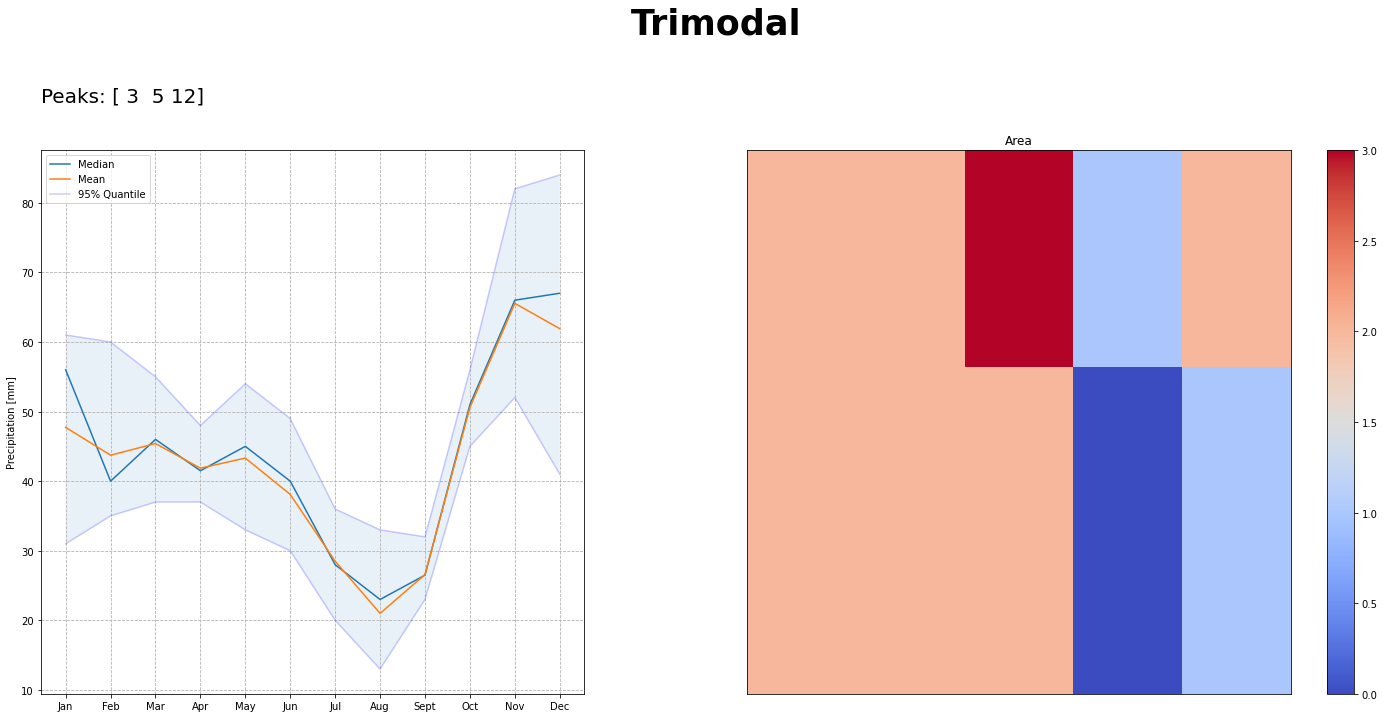

In [3]:
from datetime import datetime
start_time = datetime.now()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from modality import Modality
from matplotlib.patches import Rectangle
from latlon_utils import get_climate
from latlon_utils import get_country
#https://pypi.org/project/latlon-utils/
import warnings
warnings.filterwarnings("ignore")

#Set the new matrices
mod = []
flats = []
peak = []
med = []
text = []
w = []
w1 = rasterio.open(r'C:\Users\owner\Google Drive 2\Additional Thesis\wc2.1_10m_prec\wc2.1_10m_prec_01.tif').read()

x1, y1 = marker1.location
x2, y2 = marker2.location

k = 5
x = np.linspace(x1, x2, k)
y = np.linspace(y1, y2, k)

plt.figure();
for i in range(k):
     for j in range(k):
            P = np.array(get_climate(x[i], y[j])[17:29])
            med.append(P)
            if not P.any() < 0:
                mod.append(sum(Modality(P)[0]))
                flats.append(Modality(P)[1])
                peak.append(Modality(P)[2])
            else:
                mod.append(np.nan)
                flats.append(np.nan)
                peak.append(np.nan)
med = np.array(med)
med = np.where(med == -32768, np.nan, med)

#World
months = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')
mo = np.arange(len(months))
plt.figure(figsize = (20, 20))
mapp = w1[0].astype("float")
mapp[np.isnan(mapp)] = -1
mapp[mapp >= 0] = 1

#Stats
if not np.isnan(med).all() == True:
    median = pd.DataFrame(np.asarray(med))
    mean = np.mean(median, axis = 0)
    median = np.nanmedian(median, axis = 0)
    histogr = pd.DataFrame(np.asarray(med))
    perc25 = np.nanpercentile((np.asarray(med)), 2.5, axis = 0)
    perc975 = np.nanpercentile((np.asarray(med)), 97.5, axis = 0)
    areamod, areaflat, areapeak = Modality(np.array(median));

    if areamod.sum() == 0:
        text = 'Non-modal'
    if areamod.sum() == 1:
        text = 'Unimodal'
    if areamod.sum() == 2:
        text = 'Bimodal'
    if areamod.sum() == 3:
        text = 'Trimodal'
    if areamod.sum() > 3:
        text = 'Multimodal & rest'
    peaky = f'Peaks: {areapeak}'

    #COOL PLOT
    fig, (ax, ax2) = plt.subplots(1,2, gridspec_kw={'width_ratios': [1.5, 2]}, figsize = (25, 10))
    fig.suptitle(text, x = 0.5, y = 1.08, fontsize=35, fontweight='bold');
    ax.plot(mo, median);
    ax.plot(mo, mean);
    ax.set_ylabel('Precipitation [mm]');
    ax.plot(months, perc25, color = 'blue', alpha=0.2)
    ax.plot(months, perc975, color = 'blue', alpha=0.2)
    ax.fill_between(months, perc25, perc975, alpha=0.1)
    ax.legend(['Median', 'Mean', '95% Quantile'], loc = 'best');
    ax.grid(ls = '--');

    #Location
    ax2.title.set_text('Area')
    mapping = np.reshape(mod, ((k, k)))
    plt.imshow(mapping, cmap='coolwarm')
    ax2.grid()
    ax2.set_xticks([])
    ax2.set_yticks([])
    plt.colorbar(shrink=1);
    if areamod.any() > 0:
        ax2.text(0, 1.1, peaky, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 20)
    if len(areaflat) > 0:
        flaty = f'Flats: {areaflat}'
        ax2.text(.5, 1.1, flaty, horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize = 20)

#Duration
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))